# **Importing Libraries**

In [3]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [7]:
pip install split-folders[full]

In [ ]:
import splitfolders
input_folder = '/content/drive/MyDrive/Colab Notebooks/train'
splitfolders.ratio(input_folder,output = "dataset" ,
                   seed = 1337,ratio = (0.7,0.2,0.1),
                   group_prefix = None
                   )

Copying files: 23 files [00:10,  2.16 files/s]

**Defining data paths**

In [5]:
 train_path = '/content/dataset/test'
 test_path = '/content/dataset/train'
 val_path = '/content/dataset/val'

Open_Eyes


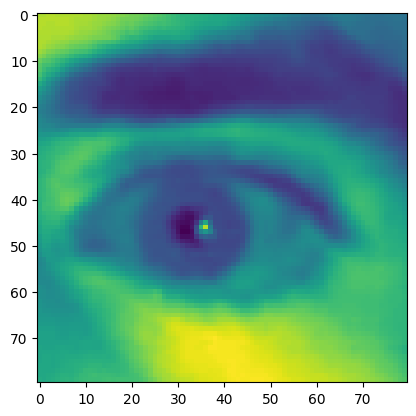

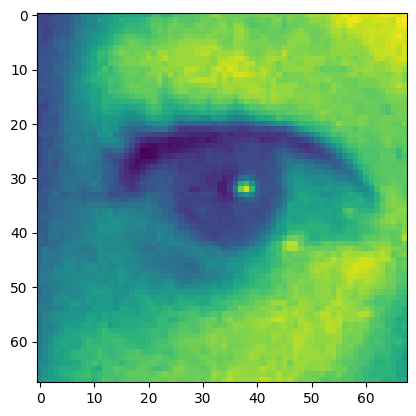

Closed_Eyes


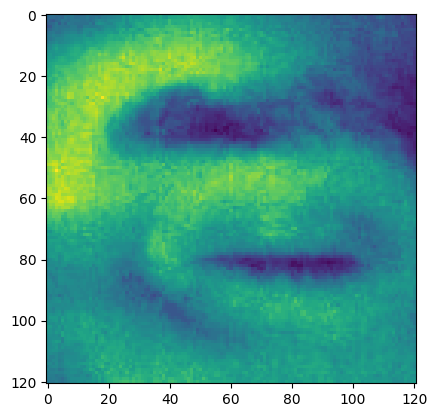

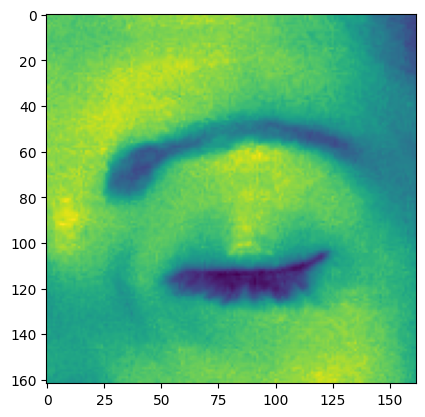

In [14]:
# for folder in os.listdir(train_path):
# #   sub_path = os.path.join(train_path, folder)
#     sub_path = train_path + '/' + folder

#     print(folder)
# for i in range(2):
#   temp_path = os.listdir(sub_path)[i]
#   temp_path = sub_path + "/" + temp_path
#   img = mpimg.imread(temp_path)
#   implt = plt.imshow(img)
#   plt.show()


for folder in os.listdir(train_path):
    sub_path = os.path.join(train_path, folder)
    print(folder)

    # Ensure that you list the images inside each folder
    images = os.listdir(sub_path)

    for i in range(min(2, len(images))):  # Ensure you don't go out of bounds
        temp_path = os.path.join(sub_path, images[i])
        img = mpimg.imread(temp_path)
        plt.imshow(img)
        plt.show()


**Converting image to pixels**

In [15]:
def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
    sub_path = os.path.join(path, folder)

    for img in os.listdir(sub_path):
      image_path = os.path.join(sub_path, img)
      img = cv2.imread(image_path)
      img = cv2.resize(img,size)
      data.append(img)
  return data

In [16]:
size = (224,224)
train_data = imagearray(train_path,size)
test_data = imagearray(test_path,size)
val_data = imagearray(val_path,size)

# **Normalization**

In [18]:
train_data = np.array(train_data)
test_data = np.array(test_data)
val_data = np.array(val_data)

[array([[[187, 187, 187],
         [187, 187, 187],
         [187, 187, 187],
         ...,
         [102, 102, 102],
         [102, 102, 102],
         [102, 102, 102]],
 
        [[187, 187, 187],
         [187, 187, 187],
         [187, 187, 187],
         ...,
         [102, 102, 102],
         [102, 102, 102],
         [102, 102, 102]],
 
        [[188, 188, 188],
         [188, 188, 188],
         [188, 188, 188],
         ...,
         [102, 102, 102],
         [101, 101, 101],
         [101, 101, 101]],
 
        ...,
 
        [[141, 141, 141],
         [141, 141, 141],
         [141, 141, 141],
         ...,
         [162, 162, 162],
         [161, 161, 161],
         [161, 161, 161]],
 
        [[142, 142, 142],
         [142, 142, 142],
         [141, 141, 141],
         ...,
         [162, 162, 162],
         [162, 162, 162],
         [162, 162, 162]],
 
        [[142, 142, 142],
         [142, 142, 142],
         [141, 141, 141],
         ...,
         [163, 163, 163],
  

In [ ]:
x_train = train_data/255
x_test = test_data/255
x_val = val_data/255

# **Defining target variables**